# Bank Loan Term Prediction
---

## Import packages & read data.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Modeling imports
from sklearn.model_selection import train_test_split


In [2]:
df1 = pd.read_csv('/Users/soaadaljafr/Downloads/archive-5/credit_test.csv')
df2 = pd.read_csv('/Users/soaadaljafr/Downloads/archive-5/credit_train.csv')
df= pd.concat([df1,df2], axis=0, ignore_index=True)   # concat two dataset
df

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0,NaN
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0,NaN
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,NaN
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,NaN
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(110867, 19)

In [4]:
df.tail(100)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
110767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

Loan ID                           867
Customer ID                       867
Current Loan Amount               867
Term                              867
Credit Score                    22002
Annual Income                   22002
Years in current job             5516
Home Ownership                    867
Purpose                           867
Monthly Debt                      867
Years of Credit History           867
Months since last delinquent    59314
Number of Open Accounts           867
Number of Credit Problems         867
Current Credit Balance            867
Maximum Open Credit               869
Bankruptcies                     1093
Tax Liens                         878
Loan Status                     10867
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110867 entries, 0 to 110866
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       110000 non-null  object 
 1   Customer ID                   110000 non-null  object 
 2   Current Loan Amount           110000 non-null  float64
 3   Term                          110000 non-null  object 
 4   Credit Score                  88865 non-null   float64
 5   Annual Income                 88865 non-null   float64
 6   Years in current job          105351 non-null  object 
 7   Home Ownership                110000 non-null  object 
 8   Purpose                       110000 non-null  object 
 9   Monthly Debt                  110000 non-null  float64
 10  Years of Credit History       110000 non-null  float64
 11  Months since last delinquent  51553 non-null   float64
 12  Number of Open Accounts       110000 non-nul

In [7]:
#duplicate = df1.duplicated()
#print(f'Duplicate in df1 :', duplicate.sum())
#duplicate = df2.duplicated()
#print(f'Duplicate in df2 :', duplicate.sum())
duplicate = df.duplicated()
print(f'Duplicate in df :', duplicate.sum())

Duplicate in df : 11081


**Rename columns for easer code writing**

In [8]:
df.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan Status'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(' ','_')

In [10]:
df.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens', 'Loan_Status'],
      dtype='object')

## Split the data for train, validation and test

In [11]:
# split the data for train and test
df_Train, df_test = train_test_split(df, test_size = 0.2, random_state = 30 )

# split the train for train and val
df_train, df_val = train_test_split(df_Train, test_size = 0.2, random_state = 30 )

In [12]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (70954, 19)
Shape of validation: (17739, 19)
Shape of test: (22174, 19)


## Data Pre-processing

### Cleaning data

In [14]:
# dope nulls in Loan_ID & Loan_Status

# for train
df_train = df_train.dropna(subset = ['Loan_ID'])
# df_train = df_train.dropna(subset = ['Loan_Status'])

# for val
df_val = df_val.dropna(subset = ['Loan_ID'])
# df_val = df_val.dropna(subset = ['Loan_Status'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])
# df_test = df_test.dropna(subset = ['Loan_Status'])

In [15]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (70385, 19)
Shape of validation: (17598, 19)
Shape of test: (22017, 19)


In [16]:
# reset index for train
df_train = df_train.reset_index(drop=True)

# reset index for val
df_val = df_val.reset_index(drop=True)

# reset index for val
df_test = df_test.reset_index(drop=True)

In [17]:
df_train.sample(20)

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
38008,cf72de06-5dde-4bea-9006-4f9fc2b9bb12,2c74320c-ad07-493b-9712-c9efcabaf088,91916.0,Short Term,748.0,756048.0,< 1 year,Rent,Buy a Car,3194.28,26.0,NaN,11.0,0.0,149207.0,372350.0,0.0,0.0,Fully Paid
22096,8cb16f19-8f03-4351-8e30-94d925bccdf8,7627633c-1362-43c9-ade4-6c6ebc5bc9d5,223476.0,Short Term,696.0,483702.0,10+ years,Own Home,Debt Consolidation,13180.68,33.8,15.0,5.0,0.0,107046.0,118734.0,0.0,0.0,Charged Off
25508,026ea24b-f92d-44bd-a0d9-d0d3129eda6c,329d306d-4635-4de9-b6ed-346c8cf695ab,180510.0,Long Term,6750.0,742368.0,< 1 year,Rent,wedding,13307.03,10.8,NaN,9.0,0.0,130435.0,184844.0,0.0,0.0,NaN
33588,c0b913e5-4ced-4482-a3e9-a8d738341e19,e20950f9-83fa-4577-9c41-b6ff5ea07c86,99999999.0,Short Term,745.0,2516208.0,7 years,Home Mortgage,Home Improvements,21177.97,24.9,NaN,9.0,0.0,381026.0,530266.0,0.0,0.0,Fully Paid
36178,7dbfe5fd-105e-439c-bbe8-bdf030e8ff77,a6d90894-8f61-44b4-ab8f-5e8b468723c6,181478.0,Short Term,723.0,762204.0,8 years,Home Mortgage,Debt Consolidation,10226.37,17.5,36.0,7.0,0.0,65075.0,82808.0,0.0,0.0,Fully Paid
61255,839cdaeb-b39a-4aeb-bffe-047ef5f12b0f,3c8c8019-1991-404c-b0bb-944b876e5511,84150.0,Short Term,740.0,493943.0,3 years,Home Mortgage,Debt Consolidation,4635.05,10.9,NaN,7.0,0.0,103379.0,129822.0,0.0,0.0,Fully Paid
63012,54ac6688-1e1b-481f-8e64-443692df79e5,e08f10eb-3660-46b2-bc57-f6c5f66ba8fd,99999999.0,Short Term,750.0,1743174.0,10+ years,Home Mortgage,Debt Consolidation,10647.98,21.8,NaN,10.0,0.0,371887.0,1251778.0,0.0,0.0,Fully Paid
57005,c987edd8-a347-4a3b-b080-cd754bdcb2cf,03f9794f-c5e6-40ad-b31b-b075cd852459,262702.0,Short Term,714.0,862163.0,NaN,Rent,other,13578.92,16.3,27.0,6.0,0.0,127243.0,218922.0,0.0,0.0,Fully Paid
22800,a7b3e5e7-4c8d-41ee-ba85-758b7ac3ea2e,c4a76248-4a95-4ab6-a961-095143b16d33,175384.0,Short Term,731.0,416537.0,10+ years,Own Home,Debt Consolidation,7775.37,26.1,NaN,3.0,0.0,113848.0,135894.0,0.0,0.0,Fully Paid
28383,fe522e99-3c69-42d4-8baa-0871316e86c0,8b657883-3201-49fe-98c9-00f746bd2470,99999999.0,Short Term,744.0,1032669.0,10+ years,Rent,Debt Consolidation,14113.20,20.2,NaN,7.0,0.0,144647.0,186098.0,0.0,0.0,Fully Paid


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70385 entries, 0 to 70384
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       70385 non-null  object 
 1   Customer_ID                   70385 non-null  object 
 2   Current_Loan_Amount           70385 non-null  float64
 3   Term                          70385 non-null  object 
 4   Credit_Score                  56818 non-null  float64
 5   Annual_Income                 56818 non-null  float64
 6   Years_in_current_job          67391 non-null  object 
 7   Home_Ownership                70385 non-null  object 
 8   Purpose                       70385 non-null  object 
 9   Monthly_Debt                  70385 non-null  float64
 10  Years_of_Credit_History       70385 non-null  float64
 11  Months_since_last_delinquent  32820 non-null  float64
 12  Number_of_Open_Accounts       70385 non-null  float64
 13  N

In [20]:
df_train.isna().sum()

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    13567
Annual_Income                   13567
Years_in_current_job             2994
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    37565
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      145
Tax_Liens                           6
Loan_Status                      6383
dtype: int64

In [21]:
df_val.isna().sum()

Loan_ID                            0
Customer_ID                        0
Current_Loan_Amount                0
Term                               0
Credit_Score                    3359
Annual_Income                   3359
Years_in_current_job             745
Home_Ownership                     0
Purpose                            0
Monthly_Debt                       0
Years_of_Credit_History            0
Months_since_last_delinquent    9249
Number_of_Open_Accounts            0
Number_of_Credit_Problems          0
Current_Credit_Balance             0
Maximum_Open_Credit                0
Bankruptcies                      39
Tax_Liens                          3
Loan_Status                     1591
dtype: int64

In [22]:
df_test.isna().sum()

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                     4209
Annual_Income                    4209
Years_in_current_job              910
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    11633
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                       42
Tax_Liens                           2
Loan_Status                      2026
dtype: int64

In [23]:
# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for val
duplicate = df_val.duplicated()
print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())

Duplicate in train : 4090
Duplicate in validation : 262
Duplicate in test : 403


In [24]:
print(f'The duplicate in Loan ID in train:',df_train.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_train.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in val:',df_val.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_val.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in taes:',df_test.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_test.Customer_ID.duplicated().sum())

The duplicate in Loan ID in train: 8765
The duplicate in Customer ID in train: 8765
The duplicate in Loan ID in val: 565
The duplicate in Customer ID in train: 565
The duplicate in Loan ID in taes: 845
The duplicate in Customer ID in train: 845


In [25]:
df_train['Loan_ID'].value_counts().sort_values(ascending=False)

1ac57536-5dbb-4ce2-85a0-377cb2a73727    2
ed87b762-0131-41be-97fc-7fc776dad0fb    2
9c4fc474-8aa1-4a3b-9d18-818bb81c6b0c    2
4a897743-b87e-4fad-a054-7d9c4f3752eb    2
14d1ab27-11ac-4575-a27b-3e4e4296fd85    2
                                       ..
1acd5ffc-d007-4393-8394-05bfd4014e15    1
5ce14772-cd0b-4fde-b594-fde1d00c5e4f    1
850502e6-8c9e-4371-b1f7-67308d3dbb68    1
a4b6cb23-8d85-4808-8bf4-c74f129a8d79    1
92b5d228-17c4-4059-b4c1-27cf15859669    1
Name: Loan_ID, Length: 61620, dtype: int64

In [26]:
df_train['Loan_ID'].nunique()

61620

In [27]:
df_train[df_train['Loan_Status'].isna()]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
6,feb282bb-3fad-46b7-b0f8-ef6026202d08,ca6e1c04-3cab-42ac-9e80-d87fb405abcc,472076.0,Long Term,704.0,1237508.0,2 years,Home Mortgage,Debt Consolidation,23997.38,20.3,NaN,15.0,0.0,621015.0,1491864.0,0.0,0.0,NaN
7,2bb59b6c-bb9a-4d4e-b401-519d2cdb5c1f,5df1d5e0-a93a-4997-aa52-45b293c32ba8,66088.0,Short Term,711.0,3233876.0,6 years,Own Home,other,24038.61,18.0,10.0,6.0,0.0,1365986.0,1717342.0,0.0,0.0,NaN
29,96221533-e640-4d07-8967-159ee2d4e2bc,6b16e5ef-88be-46ac-b9ed-f53c59cb50e9,133474.0,Short Term,725.0,671783.0,6 years,Own Home,Debt Consolidation,10860.40,10.9,9.0,9.0,0.0,62890.0,131186.0,0.0,0.0,NaN
31,f122a8e3-6504-4808-84f7-6dd5115dceb1,91378b9c-ca3a-4c12-a0dc-1394d30be104,246620.0,Long Term,709.0,950855.0,10+ years,Rent,Debt Consolidation,12994.86,32.2,NaN,9.0,0.0,202559.0,264110.0,0.0,0.0,NaN
36,fd4ab500-e940-4033-9bd8-9f790ced79ab,ec53ade5-c44b-4c79-8d4d-188d4df9201a,133870.0,Short Term,7360.0,481745.0,3 years,Rent,Debt Consolidation,10196.92,8.0,NaN,11.0,0.0,82023.0,131560.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70332,d8ad20fc-e55d-4100-a171-1280d9686941,17c16b3f-bf31-424e-a130-da6e3c388509,99999999.0,Short Term,749.0,952755.0,10+ years,Home Mortgage,Debt Consolidation,7606.27,36.5,NaN,9.0,0.0,324767.0,1387650.0,0.0,0.0,NaN
70338,3a2d6cfe-40db-478f-8e77-5a4eb69d96ed,20c61634-3714-4e73-8443-54e0ddb9f0b4,431376.0,Short Term,747.0,829977.0,NaN,Home Mortgage,Debt Consolidation,13556.50,19.9,NaN,6.0,0.0,443897.0,917796.0,0.0,0.0,NaN
70340,148df809-9ea8-4558-a641-e50b60f63238,9e7211a2-db24-4aaf-957f-e9c0f2815553,216986.0,Short Term,NaN,NaN,1 year,Rent,Debt Consolidation,14412.83,19.8,74.0,9.0,0.0,171266.0,221342.0,0.0,0.0,NaN
70342,50d15d17-e179-47b6-932c-e251492b7db5,bccfa73a-31a2-4972-b8aa-073c0a52b576,110330.0,Short Term,717.0,685976.0,10+ years,Home Mortgage,Debt Consolidation,10003.88,36.5,56.0,11.0,0.0,167656.0,510840.0,0.0,0.0,NaN


In [28]:
df_train[df_train['Loan_ID'] == '53bf4fc0-8951-4329-9965-a81a852df395']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
68142,53bf4fc0-8951-4329-9965-a81a852df395,0d58dc49-dd92-4887-8117-0094d2e8ea56,62304.0,Short Term,722.0,999172.0,10+ years,Rent,Debt Consolidation,8184.82,18.7,9.0,4.0,1.0,46474.0,79134.0,1.0,0.0,NaN


**The reasone for the repetition becouse the loan status has been changed from charged off to fully paid.**
Dropping the duplicat loan id and keeping only the fully paid loans.

In [29]:
df_train['Loan_Status'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [30]:
df_train['Loan_Status'].isna().sum()

6383

In [31]:
df_train = df_train[~((df_train.Loan_ID.duplicated())
                      & (df_train['Loan_Status'] != 'Fully Paid' ) 
                      & (df_train['Loan_Status'] != 'Charged Off' ))]
df_val = df_val[~((df_val.Loan_ID.duplicated())
                  & (df_val['Loan_Status'] != 'Fully Paid' ) 
                  & (df_val['Loan_Status'] != 'Charged Off' ))]
df_test = df_test[~((df_test.Loan_ID.duplicated()) 
                    & (df_test['Loan_Status'] != 'Fully Paid' )
                    & (df_test['Loan_Status'] != 'Charged Off' ))]

In [32]:
df_train[df_train['Loan_ID'] == '53bf4fc0-8951-4329-9965-a81a852df395']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
68142,53bf4fc0-8951-4329-9965-a81a852df395,0d58dc49-dd92-4887-8117-0094d2e8ea56,62304.0,Short Term,722.0,999172.0,10+ years,Rent,Debt Consolidation,8184.82,18.7,9.0,4.0,1.0,46474.0,79134.0,1.0,0.0,NaN


In [33]:
print(f'The duplicate in Loan ID in train:',df_train.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_train.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in val:',df_val.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_val.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in taes:',df_test.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_test.Customer_ID.duplicated().sum())

The duplicate in Loan ID in train: 8041
The duplicate in Customer ID in train: 8041
The duplicate in Loan ID in val: 509
The duplicate in Customer ID in train: 509
The duplicate in Loan ID in taes: 774
The duplicate in Customer ID in train: 774


In [34]:
# dope nulls in Loan_ID & Loan_Status

# for train
df_train = df_train.dropna(subset = ['Loan_ID'])
# df_train = df_train.dropna(subset = ['Loan_Status'])

# for val
df_val = df_val.dropna(subset = ['Loan_ID'])
# df_val = df_val.dropna(subset = ['Loan_Status'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])
# df_test = df_test.dropna(subset = ['Loan_Status'])

In [35]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (69661, 19)
Shape of validation: (17542, 19)
Shape of test: (21946, 19)


In [36]:
# check again for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for val
duplicate = df_val.duplicated()
print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())

Duplicate in train : 4090
Duplicate in validation : 262
Duplicate in test : 403


In [37]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    13481
Annual_Income                   13481
Years_in_current_job             2963
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    37204
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      142
Tax_Liens                           6
Loan_Status                      5659
dtype: int64

In [38]:
# drop nulls in Annual_Income

# for train
df_train = df_train[~df_train.Annual_Income.isna()]

# for val
df_val = df_val[~df_val.Annual_Income.isna()]

# for test
df_test = df_test[~df_test.Annual_Income.isna()]

In [39]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (56180, 19)
Shape of validation: (14197, 19)
Shape of test: (17743, 19)


In [40]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2381
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    29827
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      115
Tax_Liens                           4
Loan_Status                      4510
dtype: int64

In [41]:
df_train['Credit_Score'].nunique()

320

In [42]:
# # fill nulls in Credit_Score with median

# # for train
# median = df_train['Credit_Score'].median()
# df_train['Credit_Score'].fillna(median, inplace=True)

# # for val
# median = df_val['Credit_Score'].median()
# df_val['Credit_Score'].fillna(median, inplace=True)

# # for test
# median = df_test['Credit_Score'].median()
# df_test['Credit_Score'].fillna(median, inplace=True)



# # fill nulls in Annual_Income with median

# # for train
# median = df_train['Annual_Income'].median()
# df_train['Annual_Income'].fillna(median, inplace=True)

# # for val
# median = df_val['Annual_Income'].median()
# df_val['Annual_Income'].fillna(median, inplace=True)

# # for test
# median = df_test['Annual_Income'].median()
# df_test['Annual_Income'].fillna(median, inplace=True)

In [43]:
# fill nulls in Years_in_current_job & Months_since_last_delinquent

# for train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].fillna(0)
df_train['Months_since_last_delinquent'] = df_train['Months_since_last_delinquent'].fillna(0)


# for val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].fillna(0)
df_val['Months_since_last_delinquent'] = df_val['Months_since_last_delinquent'].fillna(0)


# for test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].fillna(0)
df_test['Months_since_last_delinquent'] = df_test['Months_since_last_delinquent'].fillna(0)

In [44]:
df_train.isnull().sum()

Loan_ID                            0
Customer_ID                        0
Current_Loan_Amount                0
Term                               0
Credit_Score                       0
Annual_Income                      0
Years_in_current_job               0
Home_Ownership                     0
Purpose                            0
Monthly_Debt                       0
Years_of_Credit_History            0
Months_since_last_delinquent       0
Number_of_Open_Accounts            0
Number_of_Credit_Problems          0
Current_Credit_Balance             0
Maximum_Open_Credit                1
Bankruptcies                     115
Tax_Liens                          4
Loan_Status                     4510
dtype: int64

In [45]:
# drop nulls 

# for train
df_train = df_train.dropna()

# for val
df_val = df_val.dropna()

# for test
df_test = df_test.dropna()

In [61]:
df_train.isnull().sum()

Loan_ID                            0
Customer_ID                        0
Current_Loan_Amount                0
Term                               0
Credit_Score                       0
Annual_Income                      0
Years_in_current_job            2182
Home_Ownership                     0
Purpose                            0
Monthly_Debt                       0
Years_of_Credit_History            0
Months_since_last_delinquent       0
Number_of_Open_Accounts            0
Number_of_Credit_Problems          0
Current_Credit_Balance             0
Maximum_Open_Credit                0
Bankruptcies                       0
Tax_Liens                          0
Loan_Status                        0
dtype: int64

In [48]:
df_train.duplicated().sum()

4084

In [71]:
df_train.drop_duplicates(keep=False, inplace=True)

In [74]:
df_train.duplicated().sum()

0

In [50]:
df_train.value_counts().sum()

51567

In [51]:
df_train.Years_in_current_job.value_counts()

10+ years    16205
2 years       4687
3 years       4206
< 1 year      4205
5 years       3550
1 year        3273
4 years       3077
6 years       2928
7 years       2855
8 years       2373
0             2182
9 years       2026
Name: Years_in_current_job, dtype: int64

In [84]:
# Convert the Years_in_current_job into INT

#df_train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].replace(['10+ years'],"10 years");

#df_val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].replace(['10+ years'],"10 years");

#df_test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].replace(['10+ years'],"10 years");


In [85]:
#df_train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].replace(['< 1 year'],"1 year");
#df_val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].replace(['< 1 year'],"1 year");
#df_test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].replace(['< 1 year'],"1 year");

In [88]:
#DF_TRAIN
df_train['Years_in_current_job'] = df_train.Years_in_current_job.str.strip('years')
#df_val
df_val['Years_in_current_job'] = df_val.Years_in_current_job.str.strip('years')
#df_test
df_test['Years_in_current_job'] = df_test.Years_in_current_job.str.strip('years')

In [83]:
df_train.Years_in_current_job.value_counts()

10    13495
1      6326
6      4346
2      4007
3      3552
5      3006
4      2597
7      2373
8      1999
9      1698
Name: Years_in_current_job, dtype: int64

In [76]:
df_train.Years_in_current_job.isna().sum()

1842

In [91]:
median = df_train['Years_in_current_job'].median()
df_train['Years_in_current_job'].fillna(median, inplace=True)

median = df_val['Years_in_current_job'].median()
df_val['Years_in_current_job'].fillna(median, inplace=True)


median = df_test['Years_in_current_job'].median()
df_test['Years_in_current_job'].fillna(median, inplace=True)


In [92]:
df_train['Years_in_current_job']= df_train['Years_in_current_job'].astype(int)
#df_val
df_val['Years_in_current_job']= df_val['Years_in_current_job'].astype(int)
#df_test
df_test['Years_in_current_job']= df_test['Years_in_current_job'].astype(int)

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43399 entries, 0 to 70384
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       43399 non-null  object 
 1   Customer_ID                   43399 non-null  object 
 2   Current_Loan_Amount           43399 non-null  float64
 3   Term                          43399 non-null  object 
 4   Credit_Score                  43399 non-null  float64
 5   Annual_Income                 43399 non-null  float64
 6   Years_in_current_job          43399 non-null  int64  
 7   Home_Ownership                43399 non-null  object 
 8   Purpose                       43399 non-null  object 
 9   Monthly_Debt                  43399 non-null  float64
 10  Years_of_Credit_History       43399 non-null  float64
 11  Months_since_last_delinquent  43399 non-null  float64
 12  Number_of_Open_Accounts       43399 non-null  float64
 13  N

# Visualize data
_ _ _

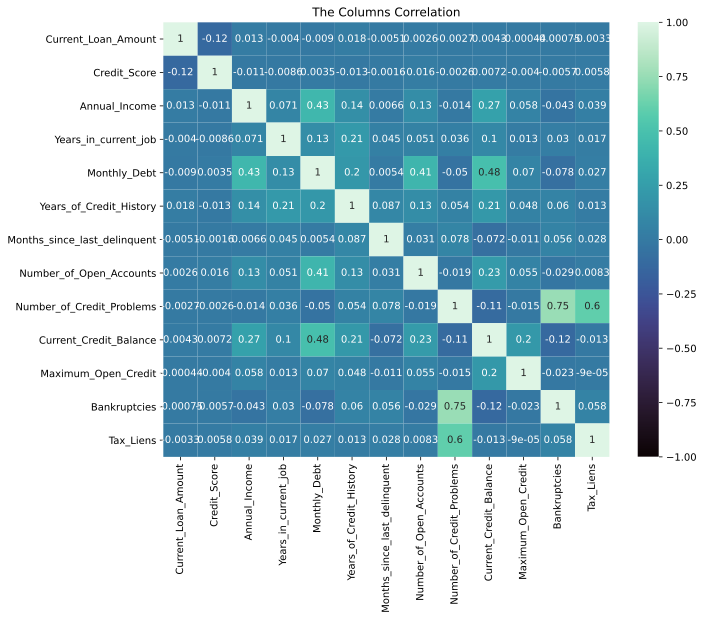

In [109]:
plt.figure(figsize=(10,8))
plt.title('The Columns Correlation')
sns.heatmap(df_train.corr(),cmap='mako', annot=True, vmin=-1, vmax=1);

# Feature Engneering

In [ ]:
Get Dummies

In [98]:
lone = df_train.select_dtypes(exclude=['object']).copy()
bank_lone1=df_train.loc[:,['Term','Home_Ownership','Purpose','Loan_Status']]

In [100]:
df_dum_lone = pd.get_dummies(bank_lone1, drop_first=True)

bank_lone = pd.concat([lone, df_dum_lone], axis=1)
bank_lone.head(5)

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,...,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan_Status_Fully Paid
0,99999999.0,714.0,1657617.0,1,20582.13,16.5,0.0,9.0,2.0,83999.0,...,0,0,0,0,0,0,0,0,0,1
3,462836.0,717.0,1617907.0,4,32358.14,16.4,56.0,13.0,0.0,420755.0,...,0,0,0,0,0,0,0,0,0,1
4,332046.0,707.0,1338246.0,2,21188.80,21.0,0.0,10.0,0.0,396074.0,...,0,0,0,0,0,0,0,0,0,1
5,310134.0,706.0,1721799.0,9,37018.65,20.7,37.0,11.0,0.0,382299.0,...,0,0,0,0,1,0,0,0,0,0
8,135190.0,678.0,599621.0,6,4807.00,20.1,32.0,8.0,0.0,138814.0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
bank_lone.columns

Index(['Current_Loan_Amount', 'Credit_Score', 'Annual_Income',
       'Years_in_current_job', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens', 'Term_Short Term',
       'Home_Ownership_Home Mortgage', 'Home_Ownership_Own Home',
       'Home_Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding', 'Loan_Status_Fully Paid'],
      dtype='object')

In [115]:
X_train = bank_lone.drop(['Term_Short Term'], axis = 1)
y_train = bank_lone['Term_Short Term']